# Proyek Analisis Data: Brazilian E-commerce
- **Nama:** Vania Rachmawati Dewi
- **Email:** a201xbm489@devacademy.id / vaniardewi@gmail.com
- **ID Dicoding:** A201XBM489

## Menentukan Pertanyaan Bisnis

- Metode pembayaran apa yang paling sering digunakan oleh pelanggan?
- Kategori produk apa yang paling banyak dan paling sedikit dibeli oleh pelanggan?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import datetime as dt
from datetime import datetime
from datetime import date
from datetime import timedelta
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Data Wrangling

### Gathering Data

In [ ]:
customers_df = pd.read_csv('/content/drive/MyDrive/Dataset/olist_customers_dataset.csv')
geolocation_df = pd.read_csv('/content/drive/MyDrive/Dataset/olist_geolocation_dataset.csv')
order_items_df = pd.read_csv('/content/drive/MyDrive/Dataset/olist_order_items_dataset.csv')
payments_df = pd.read_csv('/content/drive/MyDrive/Dataset/olist_order_payments_dataset.csv')
order_reviews_df = pd.read_csv('/content/drive/MyDrive/Dataset/olist_order_reviews_dataset.csv')
orders_df = pd.read_csv('/content/drive/MyDrive/Dataset/olist_orders_dataset.csv')
products_df = pd.read_csv('/content/drive/MyDrive/Dataset/olist_products_dataset.csv')
sellers_df = pd.read_csv('/content/drive/MyDrive/Dataset/olist_sellers_dataset.csv')
category_name_trans_df = pd.read_csv('/content/drive/MyDrive/Dataset/product_category_name_translation.csv')

In [ ]:
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [ ]:
customers_df.shape

(99441, 5)

In [ ]:
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [ ]:
geolocation_df.shape

(1000163, 5)

In [ ]:
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [ ]:
order_items_df.shape

(112650, 7)

In [ ]:
payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [ ]:
payments_df.shape

(103886, 5)

In [ ]:
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [ ]:
order_reviews_df.shape

(99224, 7)

In [ ]:
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [ ]:
orders_df.shape

(99441, 8)

In [ ]:
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [ ]:
products_df.shape

(32951, 9)

In [ ]:
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [ ]:
sellers_df.shape

(3095, 4)

In [ ]:
category_name_trans_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [ ]:
category_name_trans_df.shape

(71, 2)

**Insight:**
- Dataset terdiri dari tabel customers, geolocations, order items, order payments, order reviews, orders, products, seller, dan product category name translation.
- Gathering data merupakan langkah awal yang digunakan untuk mengetahui hubungan antar tabel dan perlu dipahami dengan baik untuk analisis yang akurat.

### Assessing Data

**Missing Value**

In [ ]:
customers_df.isnull().sum()

,0
customer_id,0
customer_unique_id,0
customer_zip_code_prefix,0
customer_city,0
customer_state,0


In [ ]:
geolocation_df.isnull().sum()

,0
geolocation_zip_code_prefix,0
geolocation_lat,0
geolocation_lng,0
geolocation_city,0
geolocation_state,0


In [ ]:
payments_df.isnull().sum()

,0
order_id,0
payment_sequential,0
payment_type,0
payment_installments,0
payment_value,0


In [ ]:
order_items_df.isnull().sum()

,0
order_id,0
order_item_id,0
product_id,0
seller_id,0
shipping_limit_date,0
price,0
freight_value,0


In [ ]:
order_reviews_df.isnull().sum()

,0
review_id,0
order_id,0
review_score,0
review_comment_title,87656
review_comment_message,58247
review_creation_date,0
review_answer_timestamp,0


Terdapat missing value pada kolom *review_comment_title* dan *review_comment_message*, sehingga perlu dilakukan pembersihan data.

In [ ]:
orders_df.isnull().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0


Terdapat missing value pada kolom *order_approved_at*, *order_delivered_carrier_date*, *order_delivered_customer_date*. Sehingga harus dilakukan pembersihan data.

In [ ]:
products_df.isnull().sum()

,0
product_id,0
product_category_name,610
product_name_lenght,610
product_description_lenght,610
product_photos_qty,610
product_weight_g,2
product_length_cm,2
product_height_cm,2
product_width_cm,2


Terapat missing value pada kolom *product_category_name*, *product_name_lenght*, *product_description_lenght* dan *product_photos_qty*.

In [ ]:
sellers_df.isnull().sum()

,0
seller_id,0
seller_zip_code_prefix,0
seller_city,0
seller_state,0


In [ ]:
category_name_trans_df.isnull().sum()

,0
product_category_name,0
product_category_name_english,0


In [ ]:
customers_df.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


In [ ]:
geolocation_df.describe()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


In [ ]:
order_items_df.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


Pada harga produk (*price*) dan biaya pengiriman (*freight_value*) menunjukkan bahwa ada outlier dengan harga sangat tinggi atau sangat rendah.

In [ ]:
payments_df.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


In [ ]:
order_reviews_df.describe()

,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [ ]:
products_df.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


In [ ]:
orders_df.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,2018-08-02 12:06:07,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-14 20:02:44,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


In [ ]:
sellers_df.describe()

,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


In [ ]:
category_name_trans_df.describe()

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


**Duplikasi Data**

In [ ]:
print('Jumlah Duplikasi :', customers_df.duplicated().sum())

Jumlah Duplikasi : 0


In [ ]:
print('Jumlah Duplikasi :', geolocation_df.duplicated().sum())

Jumlah Duplikasi : 261831


Terdapat duplikasi data pada dataset geolocation sebanyak 261831 dan perlu dilakukan pembersihan data.

In [ ]:
print('Jumlah Duplikasi :', payments_df.duplicated().sum())

Jumlah Duplikasi : 0


In [ ]:
print('Jumlah Duplikasi :', order_items_df.duplicated().sum())

Jumlah Duplikasi : 0


In [ ]:
print('Jumlah Duplikasi :', order_reviews_df.duplicated().sum())

Jumlah Duplikasi : 0


In [ ]:
print('Jumlah Duplikasi :', orders_df.duplicated().sum())

Jumlah Duplikasi : 0


In [ ]:
print('Jumlah Duplikasi :', products_df.duplicated().sum())

Jumlah Duplikasi : 0


In [ ]:
print('Jumlah Duplikasi :', sellers_df.duplicated().sum())

Jumlah Duplikasi : 0


In [ ]:
print('Jumlah Duplikasi :', category_name_trans_df.duplicated().sum())

Jumlah Duplikasi : 0


**Kesalahan Tipe Data**

In [ ]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [ ]:
geolocation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [ ]:
payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [ ]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


Terdapat kesalahan tipe data pada kolom *shipping_limit_date* yang seharusnya bertipe data datetime.

In [ ]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


Terdapat kesalahan tipe data pada kolom *review_creation_date* dan *review_answer_timestamp*. Sehingga perlu dilakukan perbaikan tipe data.

In [ ]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


Terdapat kesalahan tipe data pada kolom *order_purchase_timestamp* , *order_approved_at*, *order_delivered_carier_date* , *order_delivered_customer_date* dan *order_estimated_delivery_date*. Sehinnga perlu dilakukan perbaikan data.

In [ ]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [ ]:
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [ ]:
category_name_trans_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


**Insight:**
- Missing Values :
  - Terdapat beberapa kolom memiliki data yang hilang, pada tabel order reviews s seperti *review_comment_title* dan *review_comment_message*. Pada tabel orders di kolom *order_approved_at*, *order_delivered_carrier* dan *order_delivered_date*.
  - Missing values perlu diperiksa lebih lanjut apakah bisa diimputasi atau perlu dihapus.
- Duplikat Data :
  - Terdapat duplikasi data pada tabel geolocation, dan hal ini perlu dilakukan pembersihan data.
- Inconsisten Data :
  - Kesalahan tipe data pada kolom *shipping_limit_date*, *review_creation_date*, *review_answer_timestamp*, *order_purchase_timestamp*, *order_delivered_carrier_date*, *order_delivered_customer_date* dan *order_estimated_delivery_date* perlu dilakukan perbaikan tipe data yang semula object menjadi datetime.


### Cleaning Data

**Memperbaiki Tipe Data**

In [ ]:
date_time_columns = ["shipping_limit_date"]
for column in date_time_columns :
  order_items_df[column] = pd.to_datetime(order_items_df[column])

In [ ]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


In [ ]:
date_time_columns = ["review_answer_timestamp", "review_creation_date"]
for column in date_time_columns :
  order_reviews_df[column] = pd.to_datetime(order_reviews_df[column])

In [ ]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     11568 non-null  object        
 4   review_comment_message   40977 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


In [ ]:
date_time_columns = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']
for column in date_time_columns :
  orders_df[column] = pd.to_datetime(orders_df[column])

In [ ]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


**Memperbaiki Missing Value**

In [ ]:
order_reviews_df[order_reviews_df['review_comment_title'].isna()]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01,2018-07-02 12:59:13


In [ ]:
order_reviews_df[order_reviews_df['review_comment_message'].isna()]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17,2018-02-18 14:36:24
5,15197aa66ff4d0650b5434f1b46cda19,b18dcdf73be66366873cd26c5724d1dc,1,NaN,NaN,2018-04-13,2018-04-16 00:39:37
6,07f9bee5d1b850860defd761afa7ff16,e48aa0d2dcec3a2e87348811bcfdf22b,5,NaN,NaN,2017-07-16,2017-07-18 19:30:34
...,...,...,...,...,...,...,...
99217,c6b270c61f67c9f7cb07d84ea8aeaf8b,48f7ee67313eda32bfcf5b9c1dd9522d,5,NaN,NaN,2017-12-13,2017-12-14 11:09:36
99218,af2dc0519de6e0720ef0c74292fb4114,d699c734a0b1c8111f2272a3f36d398c,5,NaN,NaN,2018-04-27,2018-04-30 01:18:57
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09,2017-12-11 20:06:42


Untuk menangani missing value, metode penghapusan baris merupakan pilihan yang tepat karena jumlah missing value yang tinggi, sehingga pengisian nilai (imputation) dapat mempertahankan integrasi data.

In [ ]:
order_reviews_df['review_comment_title'].fillna('No Title', inplace=True)
order_reviews_df['review_comment_message'].fillna('No Message', inplace=True)

In [ ]:
order_reviews_df[['review_comment_title', 'review_comment_message']].head(10)

,review_comment_title,review_comment_message
0,No Title,No Message
1,No Title,No Message
2,No Title,No Message
3,No Title,Recebi bem antes do prazo estipulado.
4,No Title,Parabéns lojas lannister adorei comprar pela I...
5,No Title,No Message
6,No Title,No Message
7,No Title,No Message
8,No Title,No Message
9,recomendo,aparelho eficiente. no site a marca do aparelh...


Dapat dilihat dari output diatas untuk mengisi nilai value yang hilang pada kolom "*review_comment_title*" dan "*review_comment_message*" dengan "No Title" dan juga "No Message".

In [ ]:
orders_df[orders_df['order_approved_at'].isna()]
orders_df[orders_df['order_delivered_carrier_date'].isna()]
orders_df[orders_df['order_delivered_customer_date'].isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaT,NaT,2017-05-09
44,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,NaT,2018-06-28
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaT,NaT,2018-08-21
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaT,NaT,2017-10-03
154,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10 11:33:07,2018-01-11 02:32:30,2018-01-11 19:39:23,NaT,2018-02-07
...,...,...,...,...,...,...,...,...
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaT,NaT,NaT,2018-10-01
99313,e9e64a17afa9653aacf2616d94c005b8,b4cd0522e632e481f8eaf766a2646e86,processing,2018-01-05 23:07:24,2018-01-09 07:18:05,NaT,NaT,2018-02-06
99347,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,NaT,NaT,NaT,2018-09-27
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,NaT,NaT,2017-09-15


In [ ]:
orders_df['order_approved_at'].fillna(orders_df['order_delivered_carrier_date'], inplace=True)

In [ ]:
avg_approved_to_carrier = (orders_df['order_delivered_carrier_date'] - orders_df['order_approved_at']).mean()

In [ ]:
orders_df['order_delivered_carrier_date'].fillna(orders_df['order_approved_at'] + avg_approved_to_carrier, inplace=True)

In [ ]:
avg_carrier_to_customer = (orders_df['order_delivered_customer_date'] - orders_df['order_delivered_carrier_date']).mean()

In [ ]:
orders_df['order_delivered_customer_date'].fillna(orders_df['order_delivered_carrier_date'] + avg_carrier_to_customer, inplace=True)

Mengisi nilai estimasi pengiriman dengan rata-rata waktu pengiriman.

In [ ]:
orders_df.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,146
order_delivered_carrier_date,146
order_delivered_customer_date,146
order_estimated_delivery_date,0


In [ ]:
products_df[products_df['product_category_name'].isna()]
products_df[products_df['product_name_lenght'].isna()]
products_df[products_df['product_description_lenght'].isna()]
products_df[products_df['product_photos_qty'].isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,NaN,NaN,NaN,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,NaN,NaN,NaN,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,NaN,NaN,NaN,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,NaN,NaN,NaN,NaN,1300.0,45.0,16.0,45.0


In [ ]:
products_df['product_category_name'].fillna('Not defined', inplace=True)

In [ ]:
products_df[products_df['product_category_name'] == 'Not defined'].head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,Not defined,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,Not defined,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,Not defined,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,Not defined,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,Not defined,NaN,NaN,NaN,300.0,35.0,7.0,12.0


Mengisi nilai value yang hilang pada kolom "*product_category_name*" dengan "No Not defined" untuk produk yang tidak terdeteksi namanya.

**Memperbaiki Duplikasi Data**

In [ ]:
print('Jumlah Duplikat : ', geolocation_df.duplicated().sum())

Jumlah Duplikat :  261831


In [ ]:
geolocation_df.drop_duplicates(inplace=True)

In [ ]:
print('Jumlah Duplikat (after) : ', geolocation_df.duplicated().sum())

Jumlah Duplikat (after) :  0


**Insight:**
- Menangani Missing Values :
  - *review_comment_title* dan *review_comment_message* : Terdapat banyak NaN pada kolom tersebut, kemungkinan karena pelanggan tidak memberikan ulasan. Maka dari itu dilakukan pengisian teks seperti "No Title" dan "No Message" pada nilai yang hilang.
  - *order_approved_at*, *order_delivered_carrier_date*, dan *order_delivered_customer_date*. Beberapa pesanan tidak memiliki tanggal pengiriman, kemungkinan karena pesanan dibatalkan atau belum dikirim.
  - Mengisi nilai value yang hilang pada kolom "*product_category_name*" dengan "No Not defined" untuk produk yang tidak terdeteksi namanya.
- Menghapus Duplikat Data :
  - Duplikasi data dapat menyebabkan analisis yang tidak akurat. Sehinggan pada tabel geolocation dilakukan pembesihan duplikasi data.
- Memperbaiki kesalahan tipe data :
  - Tipe data yang sebelumnya object diperbaiki menjadi tipe data datetime.

## Exploratory Data Analysis (EDA)

In [ ]:
df_1 = pd.merge(left=orders_df[['order_id', 'customer_id', 'order_approved_at',
                    'order_delivered_carrier_date', 'order_delivered_customer_date',
                    'order_estimated_delivery_date']], right=customers_df[['customer_id', 'customer_zip_code_prefix',
                        'customer_city', 'customer_state']],
                how='left',
                left_on='customer_id',
                right_on='customer_id')

In [ ]:
df_1.head()

,order_id,customer_id,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,9195,santo andre,SP


In [ ]:
df_2 = pd.merge(left=df_1, right=order_reviews_df[['order_id', 'review_score']],
                how='left',
                left_on='order_id',
                right_on='order_id')

In [ ]:
df_2.head()

,order_id,customer_id,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_zip_code_prefix,customer_city,customer_state,review_score
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,3149,sao paulo,SP,4.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,47813,barreiras,BA,4.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,75265,vianopolis,GO,5.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,59296,sao goncalo do amarante,RN,5.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,9195,santo andre,SP,5.0


In [ ]:
df_3 = pd.merge(left=df_2, right=order_items_df[['order_id', 'product_id', 'seller_id', 'price', 'freight_value']],
                how='left',
                left_on='order_id',
                right_on='order_id')

In [ ]:
df_3.head()

,order_id,customer_id,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_zip_code_prefix,customer_city,customer_state,review_score,product_id,seller_id,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,3149,sao paulo,SP,4.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,47813,barreiras,BA,4.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,75265,vianopolis,GO,5.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,59296,sao goncalo do amarante,RN,5.0,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,9195,santo andre,SP,5.0,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,19.90,8.72


In [ ]:
df_4 = pd.merge(left=df_3, right=payments_df[['order_id', 'payment_value', 'payment_type']],
                how='left',
                left_on='order_id',
                right_on='order_id')

In [ ]:
df_5 = pd.merge(left=df_4, right=products_df[['product_id', 'product_category_name']],
                how='left',
                left_on='product_id',
                right_on='product_id')

In [ ]:
df_6 = pd.merge(left=df_5, right=category_name_trans_df[['product_category_name', 'product_category_name_english']],
                how='left',
                left_on='product_category_name',
                right_on='product_category_name')

In [ ]:
all_df = pd.merge(left=df_6, right=sellers_df,
                how='left',
                left_on='seller_id',
                right_on='seller_id')

In [ ]:
all_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,shipping_limit_date,price,freight_value,payment_value,payment_type,product_category_name,product_category_name_english,seller_zip_code_prefix,seller_city,seller_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,...,2017-10-06 11:07:15,29.99,8.72,18.12,credit_card,utilidades_domesticas,housewares,9350.0,maua,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,...,2017-10-06 11:07:15,29.99,8.72,2.00,voucher,utilidades_domesticas,housewares,9350.0,maua,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,...,2017-10-06 11:07:15,29.99,8.72,18.59,voucher,utilidades_domesticas,housewares,9350.0,maua,SP
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,...,2018-07-30 03:24:27,118.70,22.76,141.46,boleto,perfumaria,perfumery,31570.0,belo horizonte,SP
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,...,2018-08-13 08:55:23,159.90,19.22,179.12,credit_card,automotivo,auto,14840.0,guariba,SP


### Explore Customers

In [ ]:
distribusi_customers = all_df.groupby(by=['customer_state']).agg({
    'customer_unique_id' : 'nunique',
    'customer_city' : 'nunique',
})

In [ ]:
distribusi_customers = distribusi_customers.sort_values(by='customer_unique_id', ascending=False)

In [ ]:
distribusi_customers.head()

,customer_unique_id,customer_city
customer_state,,
SP,40302,629
RJ,12384,149
MG,11259,745
RS,5277,379
PR,4882,364


In [ ]:
distribusi_customers.tail()

,customer_unique_id,customer_city
customer_state,,
RO,240,35
AM,143,5
AC,77,8
AP,67,6
RR,45,2


SP (Sao Paulo) memiliki pelanggan unik sebanyak 40.302 pelanggan dari 629 kota. Ini menunjukkan bahwa SP memiliki pelanggan terbanyak di banyak kota. Kemudian kota yang paling sedikit pelanggan yaitu RR (Roraima) dengan pelanggan unik sebanyak 45 pelanggan.

###Explore Seller

In [ ]:
distribusi_sellers = all_df.groupby(by=['seller_state']).agg({
    'seller_id' : 'nunique',
    'seller_city' : 'nunique',
})

In [ ]:
distribusi_sellers = distribusi_sellers.sort_values(by='seller_id', ascending=False)

In [ ]:
distribusi_sellers.head()

,seller_id,seller_city
seller_state,,
SP,1849,261
PR,349,67
MG,244,82
SC,190,65
RJ,171,38


In [ ]:
distribusi_sellers.tail()

,seller_id,seller_city
seller_state,,
AM,1,1
AC,1,1
PI,1,1
MA,1,1
PA,1,1


Penjual terbanyak berasal dari SP (Sao Paulo) dengan jumlah penjual sebanyak 1.849. Dan penjual paling sedikit berasa dari AM (Amazon), AC (Acre), PI (Piaui), MA (Maranhao) dan PA (Para) yang hanya terdapat 1 penjual setiap negara.

###Explor Payments

In [ ]:
payment_method = all_df.groupby(by='payment_type').order_id.nunique().sort_values(ascending=False)

In [ ]:
payment_method = all_df.groupby(by='payment_type').payment_value.mean().sort_values(ascending=False)

In [ ]:
payment_method.head()

,payment_value
payment_type,
credit_card,179.723963
boleto,177.271270
debit_card,150.864531
voucher,67.427353
not_defined,0.000000


Metode pembayaran dengan credit card paling sering digunakan oleh pelanggan sebanyak 179.723. Selain credit card metode pemabayaran yang paling sering digunakan yaitu boleto dengan 177.271. Sedangkan metode pembayaran voucher memiliki rata-rata paling sedikit yaitu 67.427.

###Explore Products

In [ ]:
distribusi_products = all_df.groupby(by='product_category_name_english').agg({
    "order_id" : 'nunique',
    'payment_value' : 'sum',
})

In [ ]:
disrtribusi_products = distribusi_products.sort_values(by=('payment_value'), ascending=False)

In [ ]:
distribusi_products

,order_id,payment_value
product_category_name_english,,
agro_industry_and_commerce,182,118730.61
air_conditioning,253,91170.66
art,202,30992.93
arts_and_craftmanship,23,2326.17
audio,350,60388.62
...,...,...
stationery,2311,318105.09
tablets_printing_image,79,10042.93
telephony,4199,487189.71


Kategori produk *agro_industry_and_commerce* menghasilkan paling banyak revenue yaitu sebesar 118.730.



In [ ]:
disrtribusi_products = distribusi_products.sort_values(by=('order_id'), ascending=False)

In [ ]:
disrtribusi_products

,order_id,payment_value
product_category_name_english,,
bed_bath_table,9417,1743998.80
health_beauty,8836,1662963.59
sports_leisure,7720,1400223.07
computers_accessories,6689,1599481.06
furniture_decor,6449,1443963.61
...,...,...
arts_and_craftmanship,23,2326.17
la_cuisine,13,2913.53
cds_dvds_musicals,12,1199.43


Kategori produk yang paling banyak dibeli yaitu *bed_bath_table* dengan total transaksi sebanyak 9417 kali.

**Insight:**
*   SP (Sao Paulo) merupakan negara dengan pelanggan terbanyak dan RR (Roraima) merupakan negara paling sedikit pelanggan.
*   SP memiliki penjual paling banyak dibandingkan AM, AC, PI, MA dan PA.
- *bed_bath_table* menghasilkan revenue paling banyak dengan total transaksi sebanyak 9417 kali.
- Produk *security_and_services* paling sedikit menghasilkan revenue dan paling sedikit dibeli oleh pelanggan.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Metode pembayaran apa yang paling sering digunakan oleh pelanggan?

In [ ]:
payment_method = all_df.groupby(by='payment_type')['order_id'].nunique().reset_index()

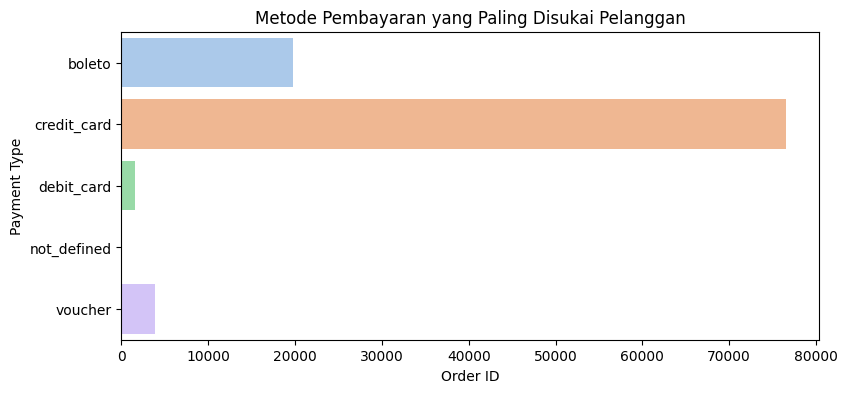

In [ ]:
plt.figure(figsize=(9, 4))
sns.barplot(x='order_id', y='payment_type', data=payment_method, palette='pastel')
plt.xlabel('Order ID')
plt.ylabel('Payment Type')
plt.title('Metode Pembayaran yang Paling Disukai Pelanggan')
plt.show()

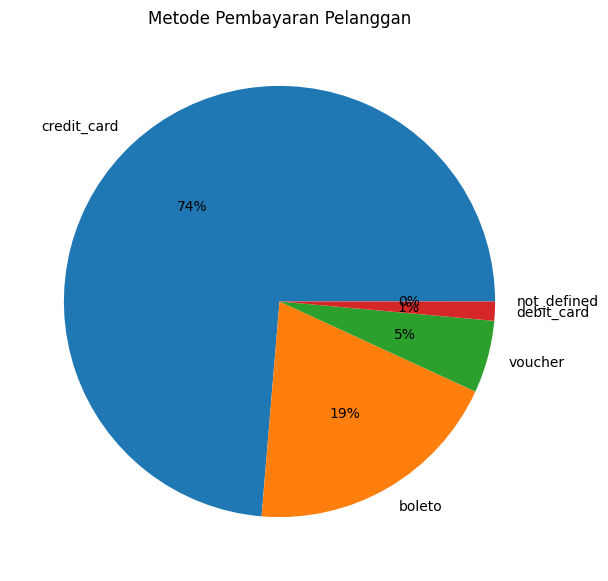

In [ ]:
plt.figure(figsize=(7,7))

payment_counts = all_df['payment_type'].value_counts()

plt.pie(payment_counts, labels=payment_counts.index, autopct='%.0f%%')

plt.title('Metode Pembayaran Pelanggan')
plt.show()

### Pertanyaan 2: Kategori produk apa yang paling banyak dan paling sedikit dibeli oleh pelanggan?

In [ ]:
sum_order_items_df = all_df.groupby('product_category_name_english').order_id.nunique().sort_values(ascending=False).reset_index()

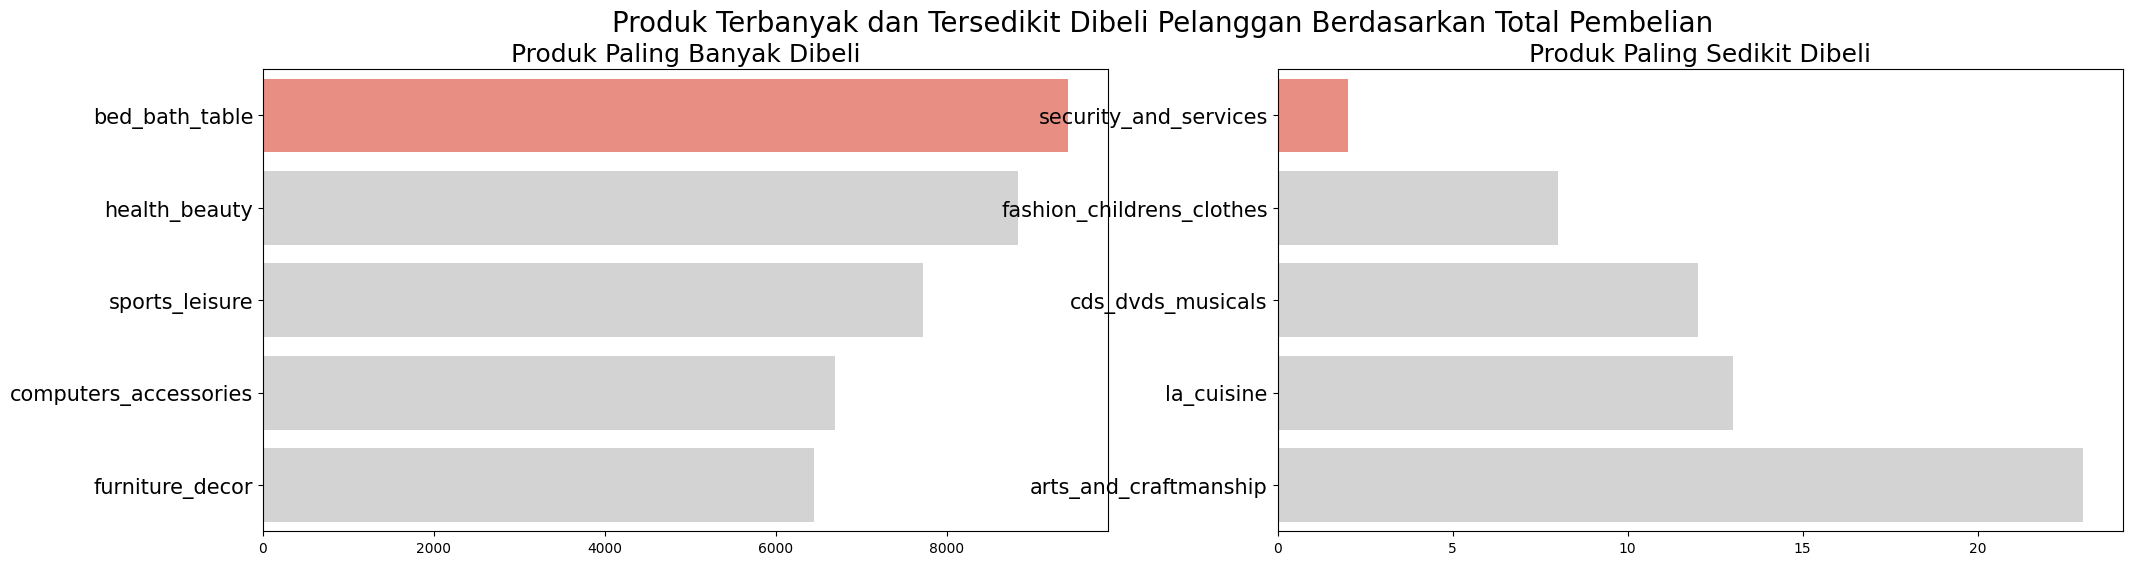

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

colors = ['salmon', '#D3D3D3', '#D3D3D3', '#D3D3D3', '#D3D3D3']

sns.barplot(x='order_id', y='product_category_name_english', data=sum_order_items_df.head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Produk Paling Banyak Dibeli", loc='center', fontsize=18)
ax[0].tick_params(axis='y', labelsize=15)

sns.barplot(x='order_id', y='product_category_name_english', data=sum_order_items_df.sort_values(by='order_id', ascending=True).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("Produk Paling Sedikit Dibeli", loc='center', fontsize=18)
ax[1].tick_params(axis='y', labelsize=15)

plt.suptitle('Produk Terbanyak dan Tersedikit Dibeli Pelanggan Berdasarkan Total Pembelian', fontsize=20)
plt.show()

# Pertanyaan 3 : Bagaimana tingkat kepuasan pelanggan berdasarkan review?

In [ ]:
review_score_counts = order_reviews_df.groupby("review_score").agg({
    "order_id": "nunique",
}).sort_values(by="order_id", ascending=False)
review_score_counts = review_score_counts.reset_index()
review_score_counts.head()

,review_score,order_id
0,5,57076
1,4,19098
2,1,11393
3,3,8160
4,2,3148


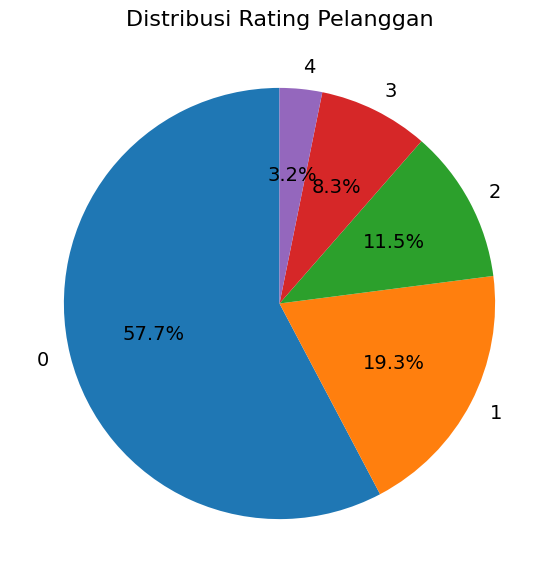

In [ ]:
plt.figure(figsize=(7, 7))
plt.pie(review_score_counts['order_id'], labels=review_score_counts.index, autopct='%1.1f%%', startangle=90,textprops={'fontsize':14})
plt.title('Distribusi Rating Pelanggan', fontsize=16)
plt.show()


**Insight:**
- Sebanyak 74% pelanggan menggunakan metode pembayaran credit card. Itu menjadikan credit card sangat populer dikalangan pelanggan untuk melakukan pembayaran. Selain credit card ada juga boleto yaitu pembayaran warga Brasil yang tidak memiliki rekening bank.
- Produk *bed_bath_table* merupakan produk yang paling banyak dibeli oleh pelanggan. Hal tersebut menunjukkan minat pelanggan yang sangat tinggi terhadap produk-produk rumah tangga seperti tempat tidur, peralatan kamar mandi, dan meja. Selain itu *health_beauty* dan *sports_leisure* juga termasuk produk yang paling banyak dibeli oleh pelanggan.
- Kategori produk *security_and_services* merupakan produk yang paling sedikit dibeli oleh pelanggan. Hal tersebut menunjukkan kurangnya minat pelanggan terhadap produk tersebut.

## Analisis Lanjutan (Opsional)

###RFM Analisis

In [ ]:
rfm_df = all_df.groupby(by='customer_id', as_index=False).agg({
    'order_approved_at' : 'max',
    'order_id' : 'nunique',
    'payment_value' : 'sum'
})
rfm_df.columns = ['customer_id', 'max_order_approved_at', 'frequency', 'monetary']
rfm_df.head()

,customer_id,max_order_approved_at,frequency,monetary
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:35:32,1,114.74
1,000161a058600d5901f007fab4c27140,2017-07-16 09:55:12,1,67.41
2,0001fd6190edaaf884bcaf3d49edf079,2017-02-28 11:15:20,1,195.42
3,0002414f95344307404f0ace7a26f1d5,2017-08-17 03:10:27,1,179.35
4,000379cdec625522490c315e70c7a9fb,2018-04-04 03:10:19,1,107.01


In [ ]:
rfm_df = all_df.groupby(by='customer_id', as_index=False).agg({
    'order_approved_at': 'max',
    'order_id': 'nunique',
    'payment_value': 'sum'
})
rfm_df.columns = ['customer_id', 'max_order_approved_at', 'frequency', 'monetary']


rfm_df['max_order_approved_at'] = pd.to_datetime(rfm_df['max_order_approved_at'], errors='coerce').dt.date


recent_date = all_df['order_approved_at'].dt.date.dropna().max()


rfm_df = rfm_df.dropna(subset=['max_order_approved_at'])
rfm_df['recency'] = rfm_df['max_order_approved_at'].apply(lambda x: (recent_date - x).days)

rfm_df.head()

,customer_id,max_order_approved_at,frequency,monetary,recency
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14,1,114.74,293
1,000161a058600d5901f007fab4c27140,2017-07-16,1,67.41,414
2,0001fd6190edaaf884bcaf3d49edf079,2017-02-28,1,195.42,552
3,0002414f95344307404f0ace7a26f1d5,2017-08-17,1,179.35,382
4,000379cdec625522490c315e70c7a9fb,2018-04-04,1,107.01,152


In [ ]:
rfm_df.describe()

,frequency,monetary,recency
count,99295.0,99295.000000,99295.000000
mean,1.0,206.902372,245.821904
std,0.0,622.775522,153.542125
min,1.0,0.000000,0.000000
25%,1.0,62.930000,122.000000
50%,1.0,110.190000,227.000000
75%,1.0,196.500000,356.000000
max,1.0,109312.640000,718.000000


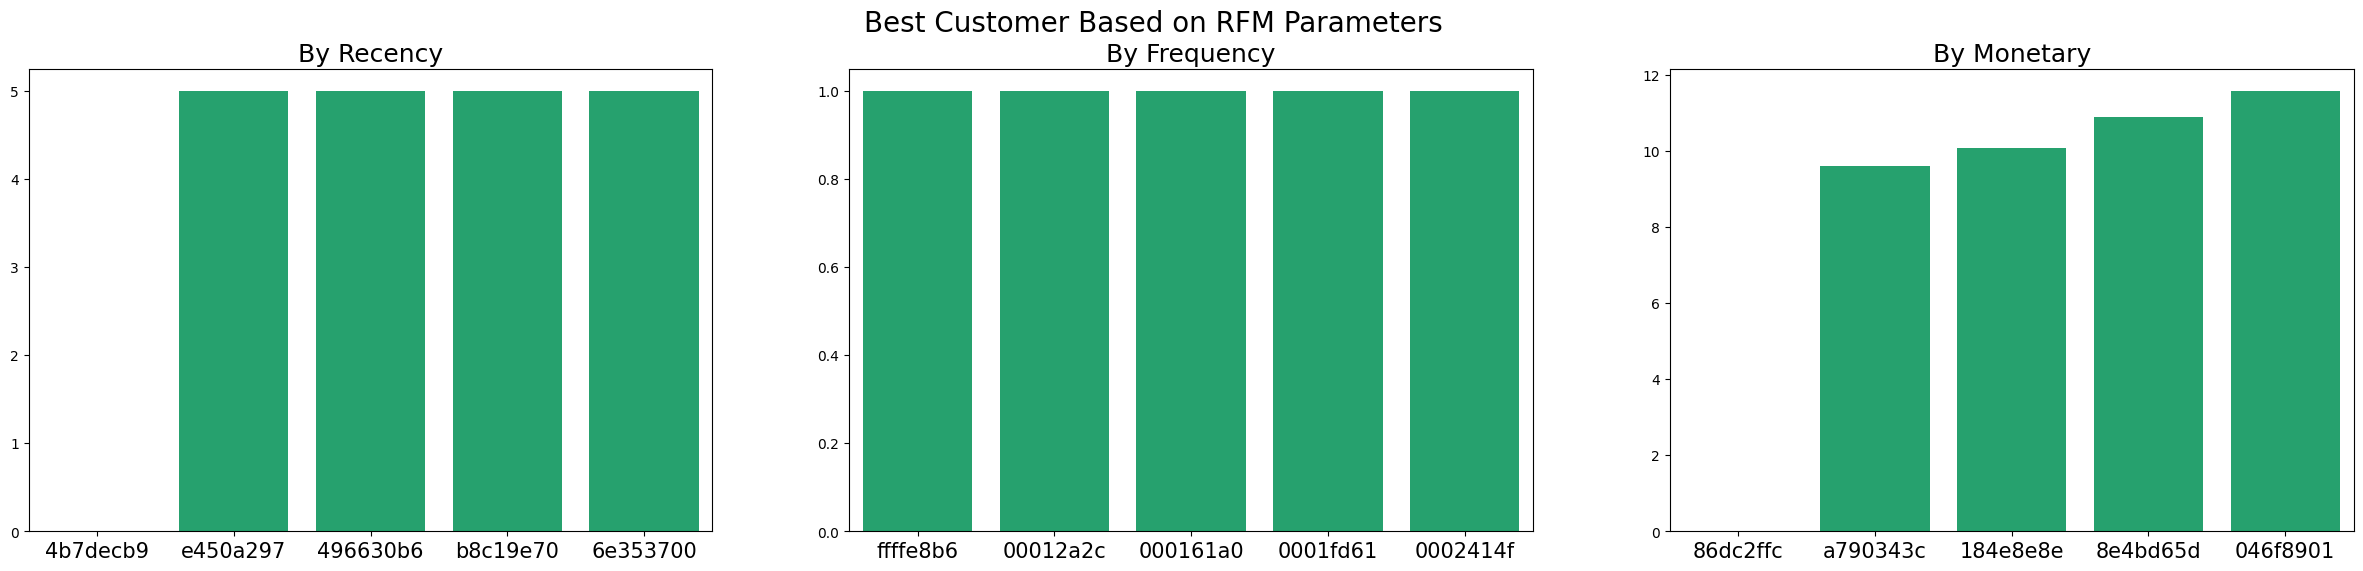

In [ ]:
rfm_df['customer_id'] = rfm_df['customer_id'].apply(lambda x: x[:8])

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))

colors = ['#11b671'] * 5

sns.barplot(y='recency', x='customer_id', data=rfm_df.sort_values(by='recency', ascending=True).head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title('By Recency', loc='center', fontsize=18)
ax[0].tick_params(axis='x', labelsize=15)

sns.barplot(y='frequency', x='customer_id', data=rfm_df.sort_values(by='frequency', ascending=False).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title('By Frequency', loc='center', fontsize=18)
ax[1].tick_params(axis='x', labelsize=15)

sns.barplot(y='monetary', x='customer_id', data=rfm_df.sort_values(by='monetary', ascending=True).head(5), palette=colors, ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title('By Monetary', loc='center', fontsize=18)
ax[2].tick_params(axis='x', labelsize=15)

plt.suptitle('Best Customer Based on RFM Parameters', fontsize=20)
plt.show()

**Geospatial Analisis**

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

all_df = gpd.read_file('/content/drive/MyDrive/Dataset/olist_geolocation_dataset.csv')
all_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,01037,-23.54562128115268,-46.63929204800168,sao paulo,SP
1,01046,-23.546081127035535,-46.64482029837157,sao paulo,SP
2,01046,-23.54612896641469,-46.64295148361138,sao paulo,SP
3,01041,-23.5443921648681,-46.63949930627844,sao paulo,SP
4,01035,-23.541577961711493,-46.64160722329613,sao paulo,SP


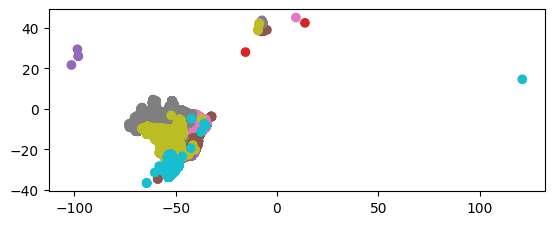

In [ ]:
gdf = gpd.GeoDataFrame(
    all_df, geometry=gpd.points_from_xy(all_df.geolocation_lng, all_df.geolocation_lat)
)
gdf.plot(column='geolocation_zip_code_prefix')
plt.show()

In [ ]:
all_df.to_csv('all_df.csv', index=False)

## Conclusion

- Metode pembayaran yang paling sering digunakan oleh pelanggan yaitu credit card. Selain credit card pelanggan juga menggunakan boleto untuk pembayaran. Sementara itu, debit card dan voucher jarang digunakan pelanggan untuk pembayaran.
- Produk yang paling banyak dibeli oleh pelanggan adalah *bed_bath_table*.
Produk yang paling sedikit dibeli oleh pelanggan adalah *security_and_services*